In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pypsa

In [ ]:
n = pypsa.Network()

eta_el = 0.1
eta_dh = 0.8
eta_direct = 0.95

el_capital_cost = 1000 # EUR/kW
dh_capital_cost = 1000 # EUR/kW

eta = eta_direct / eta_dh

n.add(
    "Link",
    "geothermal CHP electricity",
    bus0='geothermal well',
    bus1='AC bus',
    efficiency=eta_el * (1. + eta),
    capital_cost=el_capital_cost * eta_el / (1 + eta),
    p_max_pu=0.5,
)
n.add(
    "Link",
    "geothermal CHP district heat",
    bus0='geothermal well',
    bus1='DH bus',
    efficiency=eta_dh * (1 + eta),
    capital_cost=dh_capital_cost * eta_dh / (1 + eta),
    p_max_pu=eta / 2.,
)

# Plus additional constraints

# 1. p_nom of both links equal                                           -> CHP operation
# 2. p_el > alpha p_dh                                                   -> backpressure limit
# 3. p_el = p_nom * (eta_direct - (p_dh / p_nom)) / (eta_direct - 1)     -> iso fuel

# recall p_nom = p_nom_el = p_nom_dh






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 6))

ax.plot([0, 1], [1, 1,], color='red', label='ORC capacity', linewidth=2)


eta_dh = 0.8 # efficiency when heating with ORC waste heat
eta_direct = 0.95 # efficiency when heating directly with geothermal heat

e = eta_direct / eta_dh

ax.plot([1, e], [1, 0], color='blue', label='Iso fuel line', linewidth=2)

s = 0.2

m = 1 / (1 - e)
b = e / (e - 1)

x = b / (s - m)
y = x * s

ax.plot([0, x], [0, y], color='green', label='Backpressure Limit', linewidth=2, linestyle='dashed')
ax.axvline(0, color='black', linewidth=1)
ax.axhline(0, color='black', linewidth=1)

ax.set_xlabel("Heat Generation")
ax.set_ylabel("Power Generation")

fill_x = np.linspace(0, e, 100)
ax.fill_between(
    fill_x,
    np.zeros_like(fill_x),
    np.minimum(np.ones_like(fill_x), m*fill_x + b),
    color='red', alpha=0.2)

ax.text(1.2, 0.02, "A")
ax.text(1.01, 1.01, "B")

ax.legend()

ax.grid('dashed')
ax.set_ylim(-0.05, 1.1)
ax.set_xlim(-0.05, 1.4)

plt.show()

##### Testing

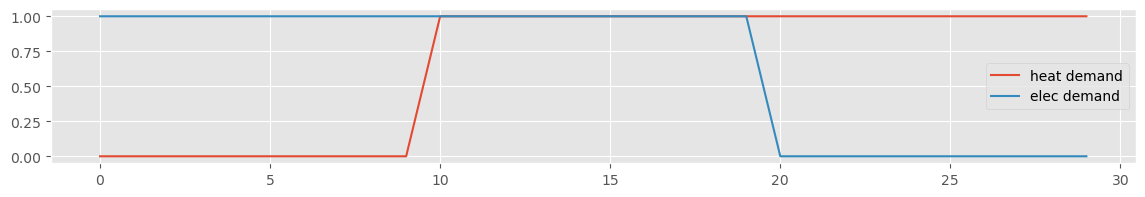

C:\Users\lukas\AppData\Local\Temp\ipykernel_27752\1145843156.py:60: DeprecatedWarning: lopf is deprecated as of 0.24 and will be removed in 1.0. Use linopy-based function ``n.optimize()`` instead. Migrate extra functionalities: https://pypsa.readthedocs.io/en/latest/examples/optimization-with-linopy-migrate-extra-functionalities.html.
  n.lopf(solver_name="gurobi")
INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 0.16s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file C:\Users\lukas\AppData\Local\Temp\pypsa-problem-lsfyojxo.lp
Reading time = 0.04 seconds
obj: 270 rows, 92 columns, 360 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 270 rows, 92 columns and 360 nonzeros
Model fingerprint: 0x932f321b
Coefficient statistics:
  Matrix range     [2e-01, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+02, 1e+02]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 2 columns
Presolve time: 0.02s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Infeasible model


('warning', 'infeasible')

In [1]:
import pypsa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

n = pypsa.Network()
s = np.arange(30)

n.set_snapshots(s)

heat_demand = np.hstack([np.zeros(10), np.ones(20)])
elec_demand = np.hstack([np.ones(20), np.zeros(10)])

n.add("Bus", "well")
n.add("Bus", "district heat")
n.add("Bus", "AC")

n.add("Generator",
    "geothermal",
    bus="well",
    p_nom_extendable=True,
    p_nom_max=100,
    marginal_cost=1,
    capital_cost=1
    )

n.add("Load", "heat load", bus="district heat", p_set=heat_demand)
n.add("Load", "elec load", bus="AC", p_set=elec_demand)

eta_el = 0.1
eta_dh = 0.8
eta_direct = 0.95

el_capital_cost = 1000 # EUR/kW
dh_capital_cost = 1000 # EUR/kW

eta = eta_direct / eta_dh

n.add(
    "Link",
    "geothermal CHP electricity",
    bus0='well',
    bus1='AC',
    efficiency=eta_el * (1. + eta),
    capital_cost=el_capital_cost * eta_el / (1 + eta),
    p_max_pu=0.5,
)
n.add(
    "Link",
    "geothermal CHP district heat",
    bus0='well',
    bus1='district heat',
    efficiency=eta_dh * (1 + eta),
    capital_cost=dh_capital_cost * eta_dh / (1 + eta),
    p_max_pu=eta / 2.,
)

fig, ax = plt.subplots(figsize=(14, 2))

ax.plot(s, heat_demand, label="heat demand")
ax.plot(s, elec_demand, label="elec demand")

ax.legend()
plt.show()

n.lopf(solver_name="gurobi")

